<a href="https://colab.research.google.com/github/ol3gka/AI_Masrters_NLA_project_1_Matrix_Masters/blob/main/Maxvol_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import itertools

Генератор случайных матриц с фиксированными сингулярными числами для тестов

In [ ]:
n, m = map(int, input('Введите размеры матрицы: ').split())
k = int(input('Введите размер крестовой аппроксимации: '))

print('Введите сингулярные числа матрицы: ')
sigma = list(map(float, input().split()))
sigma.sort(reverse=True)
if n<=m:
    S = np.hstack((np.diag(sigma), np.zeros((n,m-n))))
else:
    S = np.vstack((np.diag(sigma), np.zeros((n-m,m))))

B = np.random.randint(100, size=(n,n))
C = np.random.randint(100, size=(m,m))
Q_1 = np.linalg.qr(B, mode='reduced')[0]
Q_2 = np.linalg.qr(C, mode='reduced')[0].transpose()
A = Q_1 @ S @ Q_2
A

Введите размеры матрицы: 12 10
Введите размер крестовой аппроксимации: 5
Введите сингулярные числа матрицы: 
100 50 39 10 8 5 4 3 2 0.1


array([[-3.1447265 ,  8.60929217, 27.41798976, 16.75414666, 10.18407588,
         3.86628533, -4.27538542, 13.34938708, 13.57112158, -0.93508878],
       [ 7.10488611, -5.11977784,  7.18804199,  8.4473635 , -0.44561613,
         7.36310102, -7.53262649, 17.62493861,  0.34211527,  1.18665829],
       [20.33717132, 15.44541859, -0.84636802, 24.66984197,  1.80517825,
        25.66081518, 14.72883616, 11.59488197, 18.45519027, 23.9276745 ],
       [-3.40037555, -0.29574535, 10.22757212,  7.19516639,  1.91822349,
        -1.59725848, -4.04000612,  6.26455153,  5.16619539, -1.92431806],
       [ 6.54361641, 14.2428674 ,  4.87763734, 18.96884854,  6.94283702,
        11.7737554 , 17.30853819,  3.87891234, 18.97606576, 17.56715842],
       [17.28903611, 15.68564471, -3.46859665, 23.30814823,  4.22682851,
        28.52585022, 12.79179369, 12.98847382, 23.46432282, 23.12359213],
       [ 7.73873354,  6.10236643,  4.91535969,  9.23284782,  2.96270072,
         8.5252062 , 10.11217284,  7.48354899

# maxvol
Автор: Середа К. Д.

- добавить теоремы и советы по подбору гиперпараметров

- добавить картинки к методу

- дополнить maxvol до метода поиска с переменными направлениями


In [ ]:
def maxvol_str(A: np.ndarray, I: list) -> list:
    '''
    Функция находит строки доминантной матрицы в А

    :param A: np.ndarray размера n x r -- исходная матрица
    :param I: list из строк А длины r для начальной иницилизации hatA

    :return I_dom: list со строками доминантой матрицы hatA_dom
    '''
    delta = 10**(-2)
    hatA = A[I]
    # Начальная инициализация матриц hatA_inv и C
    hatA_inv = np.linalg.inv(hatA)
    C = A @ hatA_inv
    while np.max(abs(C))>1+delta:
        # Поиск индексов максмального по модулю элемента C
        i, j = np.asarray(np.isclose(C, C.flat[abs(C).argmax()])).nonzero()
        i, j = i[0], j[0]
        if i==j:
            break
        # Обновление hatA_inv и C
        hatA_inv = hatA_inv - (np.outer(hatA_inv[:,j],  np.dot(A[i]-A[I[j]], hatA_inv))) * 1/(1+np.dot(A[i]-A[I[j]], hatA_inv[:,j]))
        C = A @ hatA_inv
        I[j] = i # Замена индекса
        I_dom = list(I)
    return I_dom

In [ ]:
def maxvol(A: np.ndarray, r: int) -> tuple:
    '''
    Функция находит доминантную матрицу в A

    :param A: np.ndarray размера n x m -- исходная матрица
    :param r: целое число - размер крестовой аппроксимации А

    :return result: tuple (I_dom, J_dom) из двух списков индексов А, задающих доминантную матрицу
    '''
    # Начальная инициализация строк I и столбцов J искомой доминантной матрицы
    I = list(range(k))
    J = list(range(k))
    I_dom = maxvol_str(A[:, J], I) # Поиск hatA_dom по строкам в подматрице A(:, J)
    J_dom = maxvol_str(A[I_dom].T, J) # Поиск hatA_dom по столбцам в подматрице A(I_dom, :)
    result = (I_dom, J_dom)
    return result

In [ ]:
# Поиск подматрицы максимального объема в А
det = 0
I_best = np.arange(k)
J_best = np.arange(k)
for i in list(itertools.combinations(range(n), r=k)):
    for j in list(itertools.combinations(range(m), r=k)):
        B = A[i,:][:,j]
        det_l = np.linalg.det(B)
        if abs(det_l) > det:
            det = abs(det_l)
            I_best = i
            J_best = j

NameError: ignored

In [ ]:
I_res, J_res = maxvol(A, k)
E = A - A[:,J_best] @ np.linalg.inv(A[I_best,:][:,J_best]) @ A[I_best,:]
F = A - A[:,J_res] @ np.linalg.inv(A[I_res,:][:,J_res]) @ A[I_res,:]
print('Отклонение по норме Чебышева для A_max:', np.max(abs(E)))
print('Отклонение по норме Чебышева для A_dom:', np.max(abs(F)))

Отклонение по норме Чебышева для A_max: 5.6042512812783745
Отклонение по норме Чебышева для A_dom: 8.8112652547148


# maxvol-2 (rect-maxvol)
*Автор: Николаев О.В.*


Объем квадратной матрицы $A$ имеет естественный геометрический смысл как
объем параллелепипеда, натянутого на строки матрицы A, и равен
к произведению его сингулярных значений. Это определение можно прямо
обобщить на прямоугольный случай как  $\sqrt{detA^*A}$ или $\sqrt{detAA^*}$, в зависимости от
формы $A$. Предположим, что число строк матрицы $A$ не меньше
чем количество столбцов. Итак, мы используем  $\sqrt{detA^*A}$ как значение объема прямоугольной матрицы $A$:
$$
vol(A) = \sqrt{detA^*A}$$

*rect_maxvol* является естественным расширением исходного алгоритма maxvol для нахождения прямоугольной подматрицы максимального объема

Пусть матрица $A$ имеет размерность $N-на-r$ и имеет ранг $r$, $r \leq N$

Необходимо найти подматрицу максимального объема размером $K-на-r$, $K \leq N$

Максимальный объем означает, что замена колонки из найденой подматрицы на не используемую колонку из исходной матрицы не увеличивает объем

**Algorithm 1 rect_maxvol (“Greedy” maximization of the volume of submatrix)**



<div>
<img src="https://raw.githubusercontent.com/ol3gka/AI_Masrters_NLA_project_1_Matrix_Masters/main/pictures/max_vol_1.jpg" width="600"/>
</div>

In [103]:
import time
from tqdm import tqdm
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular, get_lapack_funcs, get_blas_funcs

In [4]:
def rect_maxvol(
    A,
    tol=1.0,
    maxK=None,
    min_add_K=None,
    minK=None,
    start_maxvol_iters=10,
    identity_submatrix=True,
    top_k_index=-1):
    """
    Реализация алгоритма rect_maxvol: нахождение прямоугольной подматрицы с максимальным объемом

    Args:
      A (numpy.ndarray(ndim=2)): Действительная или комплексная матрица формы (N, r), N >= r.
      tol (float, optional): Верхняя граница евклидовой нормы коэффициентов расширения строк A по строкам наилучшей (макс по объему) подматрицы. Defaults to 1.0.
      maxK (integer, optional): Максимальное количество строк в наилучшей подматрице. Defaults to N if not set explicitly.
      minK (integer, optional): Минимальное количество строк в наилучшей подматрице. Defaults to r if not set explicitly.
      min_add_K (integer, optional): Минимальное количество строк, добавляемых в квадратную подматрицу. Полученная наилучшая матрица будет содержать минимум r+min_add_K строк. Ignored if not set explicitly.
      start_maxvol_iters (integer, optional): Сколько итераций квадратного of square maxvol (optimization of 1-volume) необходимо выполнить перед фактической прямоугольной максимизацией 2-volume maximization. Defaults to 10.
      identity_submatrix (boolean, optional): maxvol. Если identity_submatrix имеет значение True, возвращаемая матрица коэффициентов будет иметь подматрицу, соответствующую хорошим строкам, установленную на единицу. Defaults to True.
      top_k_index (integer, optional): Сводные строки для наилучшей подматрицы будут находиться в диапазоне от 0 до (top_k_index-1). This restriction is ignored, if top_k_index is -1. Defaults to -1.

    Returns:
      piv (numpy.ndarray(ndim=1, dtype=numpy.int32)): Строки матрицы A,соответствующие подматрице, хорошие с точки зрения 2-volume. Shape is (K, ).
      C (numpy.ndarray(ndim=2)): Матрица коэффициентов разложения всех строк матрицы A на хорошие строки piv. Shape is (N, K).
    """
    # tol2 - квадрат параметра tol
    tol2 = tol**2
    # N - число строк, r - число колонок матрицы A
    N, r = A.shape
    # работа над параметрами
    if N <= r:
        return np.arange(N, dtype=np.int32), np.eye(N, dtype=A.dtype)
    if maxK is None or maxK > N:
        maxK = N
    if maxK < r:
        maxK = r
    if minK is None or minK < r:
        minK = r
    if minK > N:
        minK = N
    if min_add_K is not None:
        minK = max(minK, r + min_add_K)
    if minK > maxK:
        minK = maxK
        #raise ValueError('minK value cannot be greater than maxK value')
    if top_k_index == -1 or top_k_index > N:
        top_k_index = N
    if top_k_index < r:
        top_k_index = r
    # выбор изначальной подматрицы и коэффициентов согласно maxvol алгоритму
    index = np.zeros(N, dtype=np.int32)
    chosen = np.ones(top_k_index)
    tmp_index, C = square_maxvol(A, 1.05, start_maxvol_iters, top_k_index)
    index[:r] = tmp_index
    chosen[tmp_index] = 0
    C = np.asfortranarray(C)
    # вычислим квадратные 2-нормы каждой строки в матрице коэффиценттов матриы C
    row_norm_sqr = np.array([chosen[i]*np.linalg.norm(C[i], 2)**2 for
        i in range(top_k_index)])
    # находим максимальное число в row_norm_sqr
    i = np.argmax(row_norm_sqr)
    K = r
    # выберете cgeru или zgeru для комплексных чисел и dger или sger для float
    try:
        ger = get_blas_funcs('geru', [C])
    except:
        ger = get_blas_funcs('ger', [C])
    # изменяем (увеличиваем) maxvol подматрицу с каждой итерацией
    while (row_norm_sqr[i] > tol2 and K < maxK) or K < minK:
        # прибавляем i к индексу и пересчитываем С и квадратные нормы для каждой
        # строки с помощью SVM-формулы
        index[K] = i
        chosen[i] = 0
        c = C[i].copy()
        v = C.dot(c.conj())
        l = 1.0/(1+v[i])
        ger(-l,v,c,a=C,overwrite_a=1)
        C = np.hstack([C, l*v.reshape(-1,1)])
        row_norm_sqr -= (l*v[:top_k_index]*v[:top_k_index].conj()).real
        row_norm_sqr *= chosen
        # найти максимальное значение в row_norm_sqr
        i = row_norm_sqr.argmax()
        K += 1
    # если identity_submatrix is True, установите подматрицу соответсвующую
    # maxvol строкам, раной identity матрице
    if identity_submatrix:
        C[index[:K]] = np.eye(K, dtype=C.dtype)
    return index[:K].copy(), C


def square_maxvol(A, tol=1.05, max_iters=100, top_k_index=-1):
    """
    Реализация Maxvol алгоритма для использования
    """
    if tol < 1:
        tol = 1.0
    N, r = A.shape
    if N <= r:
        return np.arange(N, dtype=np.int32), np.eye(N, dtype=A.dtype)
    if top_k_index == -1 or top_k_index > N:
        top_k_index = N
    if top_k_index < r:
        top_k_index = r
    B = np.copy(A[:top_k_index], order='F')
    C = np.copy(A.T, order='F')
    H, ipiv, info = get_lapack_funcs('getrf', [B])(B, overwrite_a=1)
    index = np.arange(N, dtype=np.int32)
    for i in range(r):
        tmp = index[i]
        index[i] = index[ipiv[i]]
        index[ipiv[i]] = tmp
    B = H[:r]
    trtrs = get_lapack_funcs('trtrs', [B])
    trtrs(B, C, trans=1, lower=0, unitdiag=0, overwrite_b=1)
    trtrs(B, C, trans=1, lower=1, unitdiag=1, overwrite_b=1)
    i, j = divmod(abs(C[:,:top_k_index]).argmax(), top_k_index)
    try:
        ger = get_blas_funcs('geru', [C])
    except:
        ger = get_blas_funcs('ger', [C])
    iters = 0
    while abs(C[i,j]) > tol and iters < max_iters:
        index[i] = j
        tmp_row = C[i].copy()
        tmp_column = C[:,j].copy()
        tmp_column[i] -= 1.
        alpha = -1./C[i,j]
        ger(alpha, tmp_column, tmp_row, a=C, overwrite_a=1)
        iters += 1
        i, j = divmod(abs(C[:,:top_k_index]).argmax(), top_k_index)
    return index[:r].copy(), C.T


In [6]:
np.random.seed(100)
a = np.random.rand(1000, 30, 2).view(dtype=np.complex128)[:,:,0]
piv, C = rect_maxvol(a, 1.0)
np.allclose(a, C.dot(a[piv]))

True

In [7]:
print(f'Максималльное значение Эвклидовой нормы строк в матрице C: {max([np.linalg.norm(C[i], 2) for i in range(1000)]):.5f}')

maximum euclidian norm of row in matrix C: 1.00000


In [8]:
piv, C = rect_maxvol(a, 1.5)
np.allclose(a, C.dot(a[piv]))

True

In [9]:
print(f'Максималльное значение Эвклидовой нормы строк в матрице C: {max([np.linalg.norm(C[i], 2) for i in range(1000)]):.5f}')

maximum euclidian norm of row in matrix C: 1.49193


In [14]:
piv, C = rect_maxvol(a, 2.0)
np.allclose(a, C.dot(a[piv]))

True

In [15]:
print(f'Максималльное значение Эвклидовой нормы строк в матрице C: {max([np.linalg.norm(C[i], 2) for i in range(1000)]):.5f}')

maximum euclidian norm of row in matrix C: 1.91954


In [139]:
m = 50
time_dict = {}
for n in tqdm(np.logspace(2, 5, num=200, dtype=int)):
  # print(n)
  a = np.random.rand(n, m, 2).view(dtype=np.complex128)[:,:,0]
  start_time = time.time()
  piv, C = rect_maxvol(a, 1.0)
  end_time = time.time()
  time_dict[n]=(end_time - start_time) # секунды

100%|██████████| 200/200 [04:20<00:00,  1.30s/it]


In [140]:
time_experiments = pd.DataFrame(data=time_dict.values(), columns=["time, s"], index=time_dict.keys())

In [144]:
def fit_func(x, a, b):
  return a + b*x**1

popt, pcov = curve_fit(fit_func, list(time_dict.keys()), list(time_dict.values()))

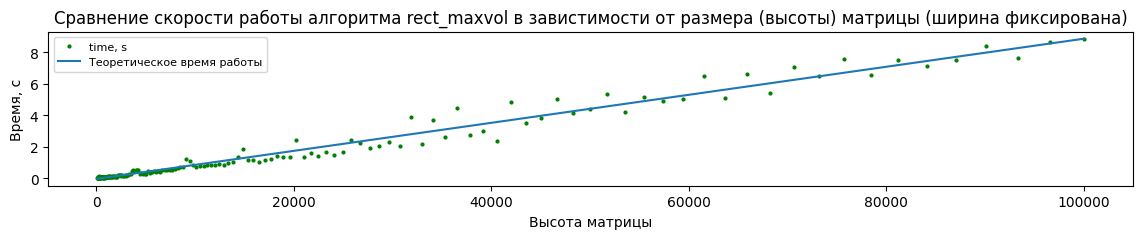

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(14, 2))
time_experiments.plot(marker='o', markersize=2, linestyle = 'None', ax=ax, c='g')

ax.plot(np.array(list(time_dict.keys())), fit_func(np.array(list(time_dict.keys())), *popt), label="Теоретическое время работы")

plt.legend(loc ="upper left", fontsize=8)
plt.title(f'Сравнение скорости работы алгоритма rect_maxvol в завистимости от размера (высоты) матрицы (ширина фиксирована)')
ax.set_xlabel(f"Высота матрицы")
ax.set_ylabel(f"Время, с")
plt.show()

In [143]:
np.linalg.cond(pcov)  # small is good


2.94206214176847e+28